In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [2]:
df_US = df[df["job_country"] == "United States"]

In [3]:
df_skilled = df_US.explode("job_skills")

In [4]:
df_skilled

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,r,"{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


In [17]:
df_skill_count = df_skilled.groupby(["job_skills","job_title_short"]).size()

In [19]:
print(df_skill_count)

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64


In [20]:
df_skill_count =df_skill_count.reset_index(name ="skill_count")

In [32]:
df_skill_count.sort_values(by = "skill_count",ascending=False,inplace= True)

In [33]:

df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [43]:
job_title = df_skill_count['job_title_short'].unique().tolist()
job_title = sorted(job_title[:3])
job_title

['Data Analyst', 'Data Engineer', 'Data Scientist']

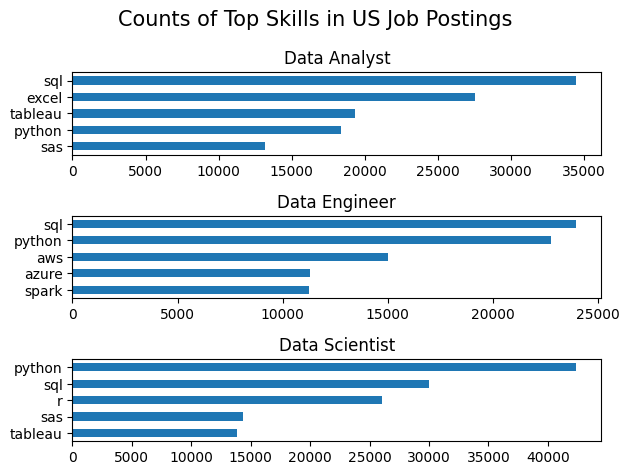

In [73]:
fig,ax = plt.subplots(len(job_title),1)

for i,jt in enumerate(job_title):
    df_plot = df_skill_count[df_skill_count["job_title_short"] == jt].head(5)
    df_plot.plot(kind ="barh",x = "job_skills",y= "skill_count",ax = ax[i],title = jt)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in US Job Postings",fontsize= 15)
plt.tight_layout()

In [58]:
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="job_total")

In [63]:
df_skill_perc = pd.merge(df_skill_count,df_job_title_count,how="left",on="job_title_short")

In [67]:
df_skill_perc["skill_percent"] =100 *df_skill_perc["skill_count"]/df_skill_perc["job_total"]
df_skill_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


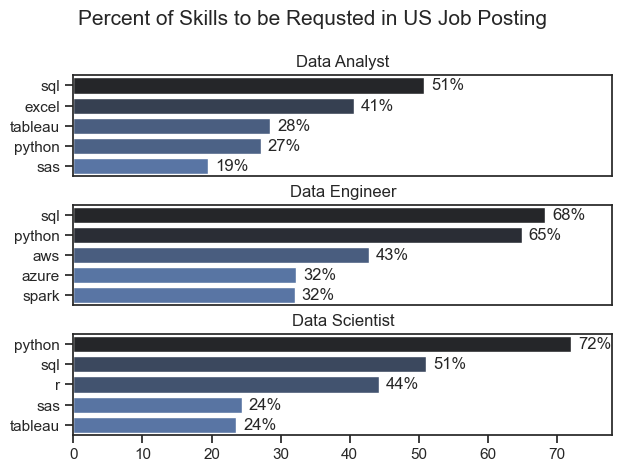

In [117]:
import seaborn as sns

fig,ax = plt.subplots(len(job_title),1)
sns.set_theme(style="ticks")
for i,jt in enumerate(job_title):
    df_plot = df_skill_perc[df_skill_perc["job_title_short"] == jt].head(5)
    
    sns.barplot(df_plot,x="skill_percent",y = "job_skills",ax = ax[i],hue ="skill_count",palette="dark:b_r")
    ax[i].set_title(jt)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)

    for j,value in enumerate(df_plot["skill_percent"]):
        ax[i].text(value + 1,j,f"{value:.0f}%",va ="center")
    if i != len(job_title)-1 :
        ax[i].set_xticks([] )

fig.suptitle("Percent of Skills to be Requsted in US Job Posting",fontsize= 15)
fig.tight_layout(
    h_pad=0.5
)
plt.show()